In [30]:
import os
import math
import fiftyone as fo
import fiftyone.brain as fob
from fiftyone import ViewField as F
from typing import Any, Dict, List, Optional, Tuple

In [31]:
fo.list_datasets()

['Deduped dataset - automatic',
 'Deduped dataset - automatic1',
 'Documents Dataset',
 'Documents Dataset - Cleaned']

In [32]:
dataset = fo.load_dataset("Documents Dataset")

In [18]:
# compute
dataset.compute_metadata()

Computing metadata...
 100% |█████████████████| 944/944 [2.0s elapsed, 0s remaining, 627.3 samples/s]      


In [33]:
session = fo.launch_app(dataset)

In [20]:
dataset.first()

<Sample: {
    'id': '6553378b45ef860d79d20e9c',
    'media_type': 'image',
    'filepath': '/Users/manan.tushar/Desktop/Projects/Id_classification/data/train/Aadhaar Front/Front_1696294707374326152_back_image.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': 118942,
        'mime_type': 'image/jpeg',
        'width': 1501,
        'height': 985,
        'num_channels': 3,
    }>,
    'ground_truth': <Classification: {
        'id': '6553378b45ef860d79d20e9a',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': None,
        'logits': None,
    }>,
    'predictions': <Classification: {
        'id': '6553378b45ef860d79d20e9b',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': 0.9536880850791931,
        'logits': array([ 4.2544394, -3.960815 ,  1.2208892, -4.5782638], dtype=float32),
    }>,
}>

## Duplicates view

Computing embeddings...
 100% |█████████████████| 944/944 [24.9s elapsed, 0s remaining, 40.3 samples/s]      
Computing uniqueness...
Uniqueness computation complete



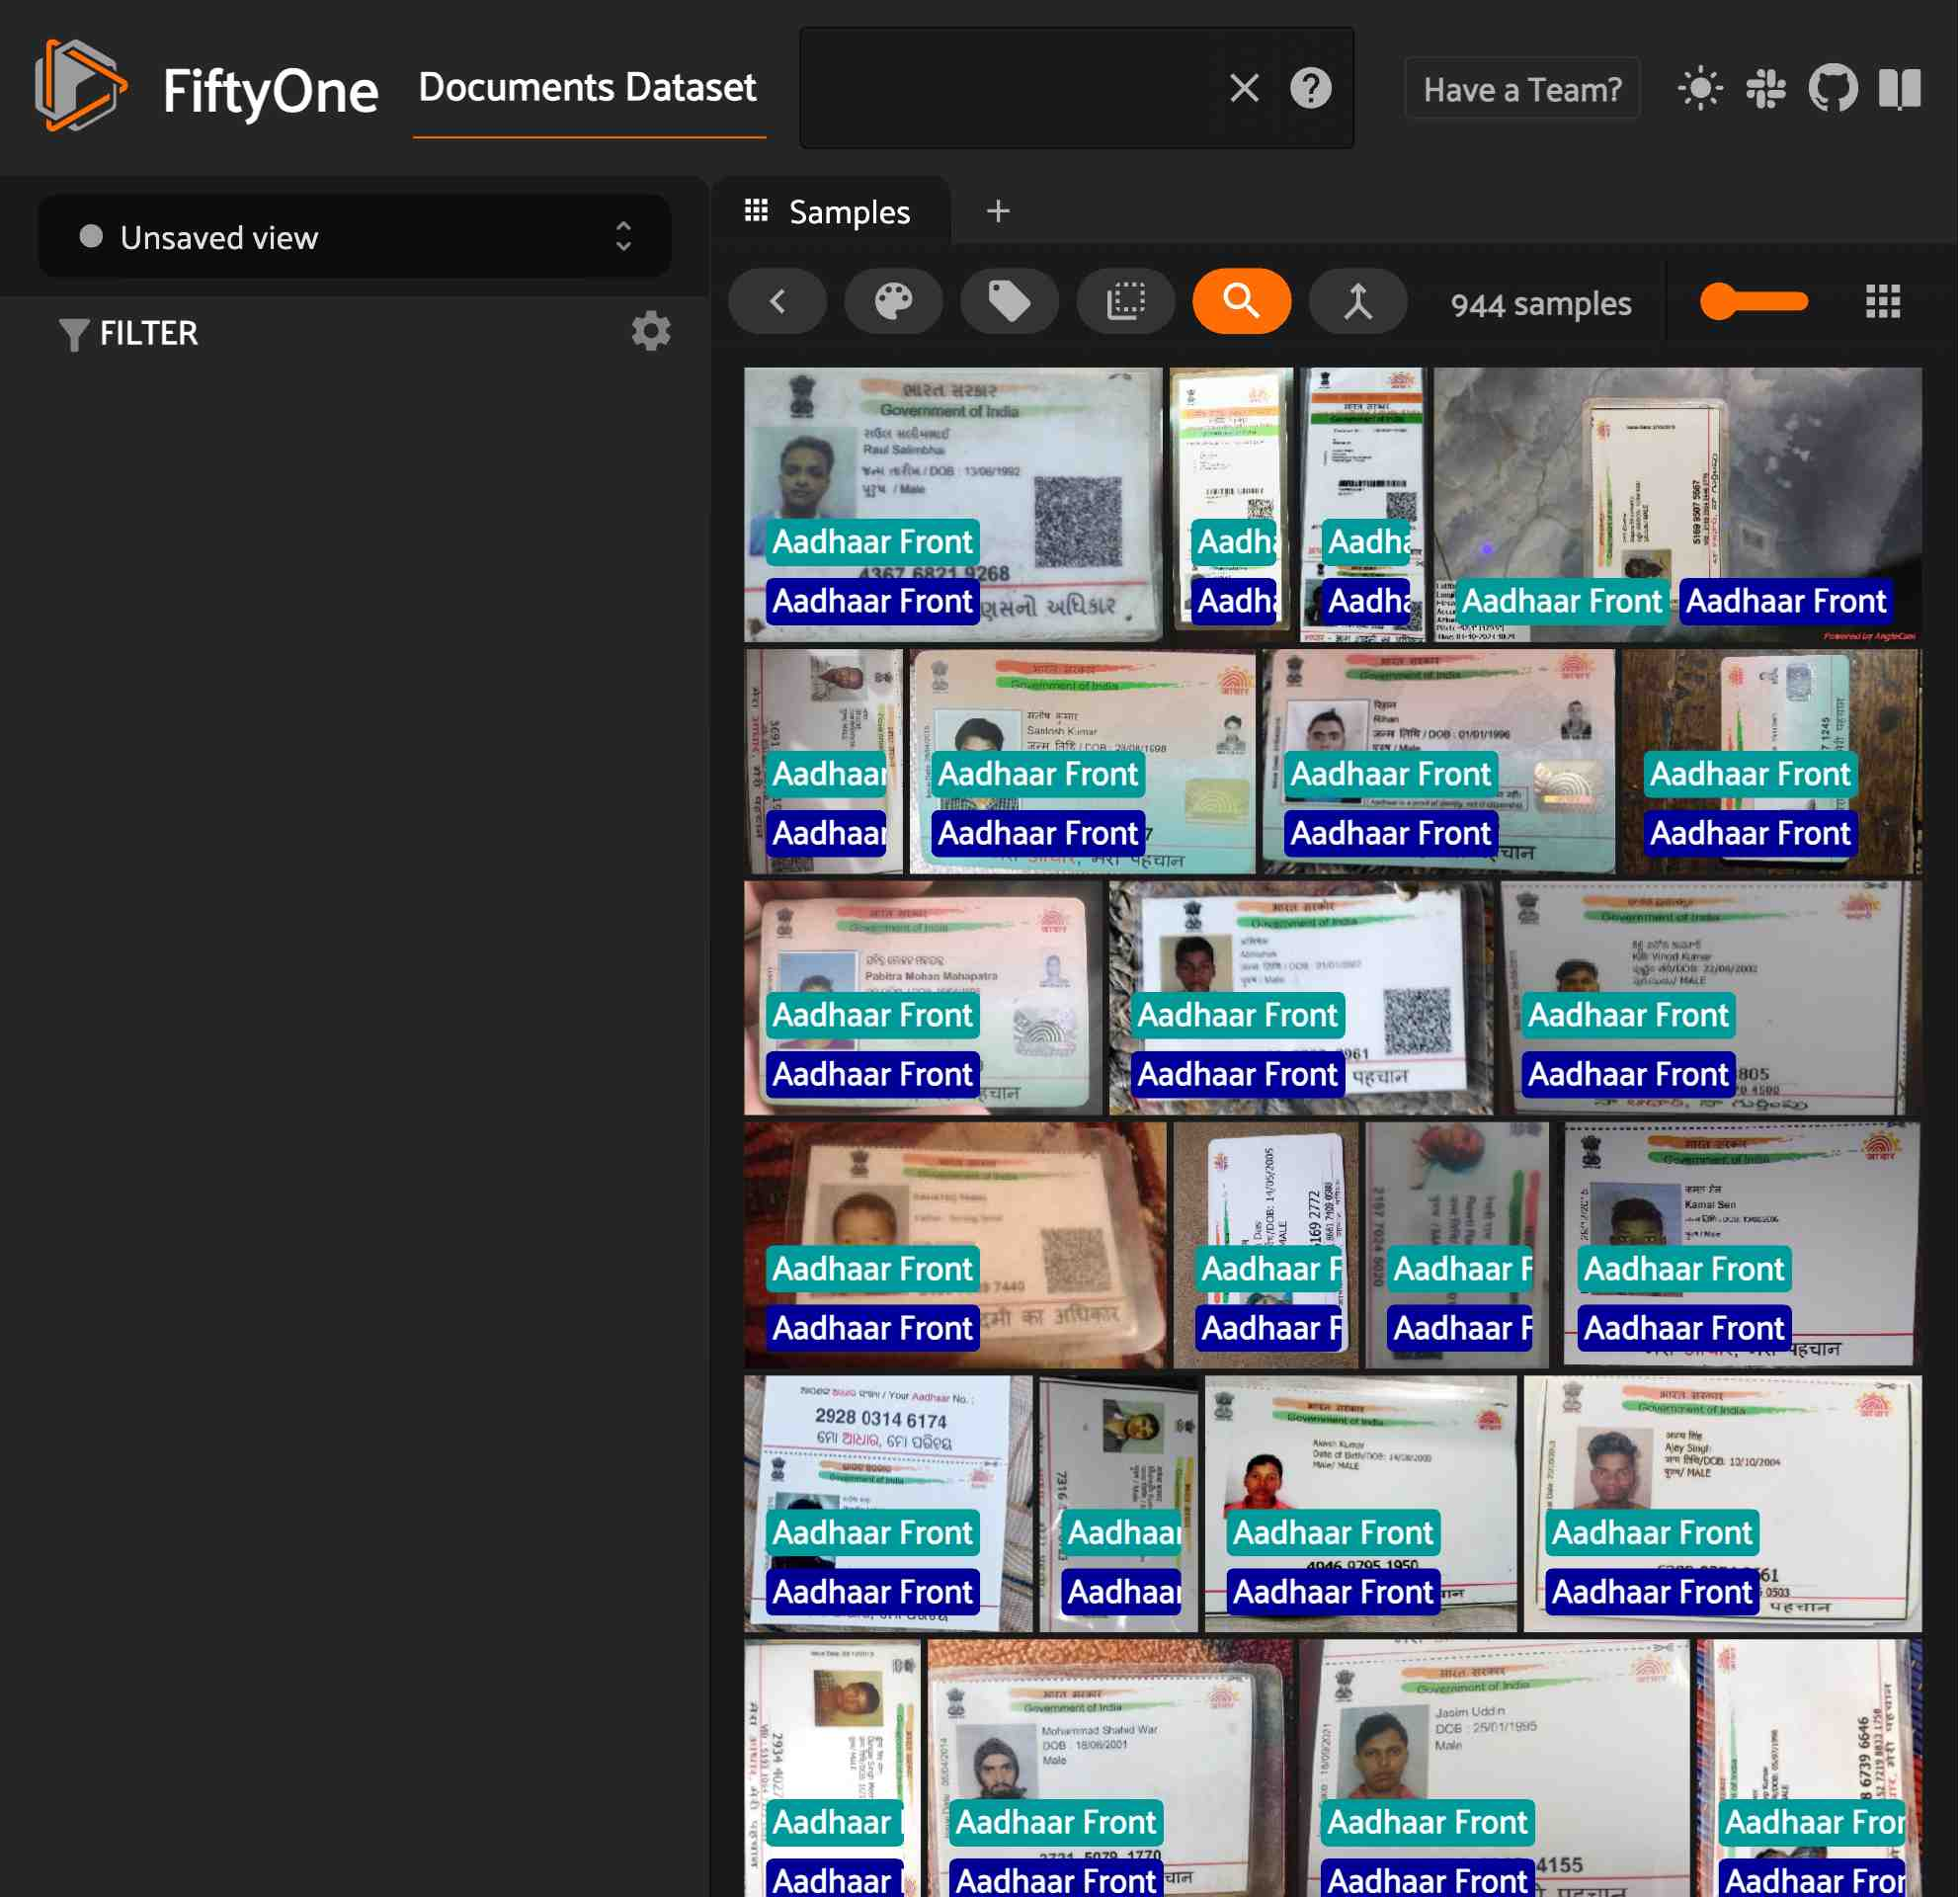

In [21]:
fob.compute_uniqueness(dataset)
# Sort in increasing order of uniqueness (least unique first)
dups_view = dataset.sort_by("uniqueness")
# Open view in the App
session.view = dups_view

## Metrics

In [22]:
eval_key = 'dinov2_base'

### Val

In [23]:
# Evaluate the predictions in the `predictions` field with respect to the
# labels in the `ground_truth` field
results_val = dataset.match_tags("val").evaluate_classifications(
    "predictions",
    gt_field="ground_truth",
    eval_key=eval_key
)

In [25]:
results_val.print_report()

               precision    recall  f1-score   support

Aadhaar Front       0.86      1.00      0.92        85
 Aadhaar back       0.88      0.90      0.89        68
      Invalid       0.84      0.64      0.73        58
          PAN       1.00      0.88      0.93         8

     accuracy                           0.87       219
    macro avg       0.90      0.85      0.87       219
 weighted avg       0.87      0.87      0.86       219



In [26]:
# Plot a confusion matrix
plot = results_val.plot_confusion_matrix()
plot.show()

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': 'c1ef81f4-ad23-4396-9af0-0cbb97e2ec89',
              'x': array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
              'y': array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253,208,162)'],
                             [0.375, 'rgb(253,174,107)'], [0.5, 'rgb(253,141,60)'],
                             [0.625, 'rgb(241,105,19)'], [0.75, 'rgb(217,72,1)'],
                             [0.875, 'rgb(166,54,3)'], [1.0, 'rgb(127,39,4)']],
              'hoverinfo': 'skip',
              'showscale': False,
              'type': 'heatmap',
              'uid': 'be2abe91-fada-4da8-8e7d-13176a5d11af',
              'z': array([[ 1,  0,  0,  7],
                          [13,  8, 37,  0],
                          [ 0, 61,  

In [33]:
plot.freeze()  # replaces interactive plot with static image


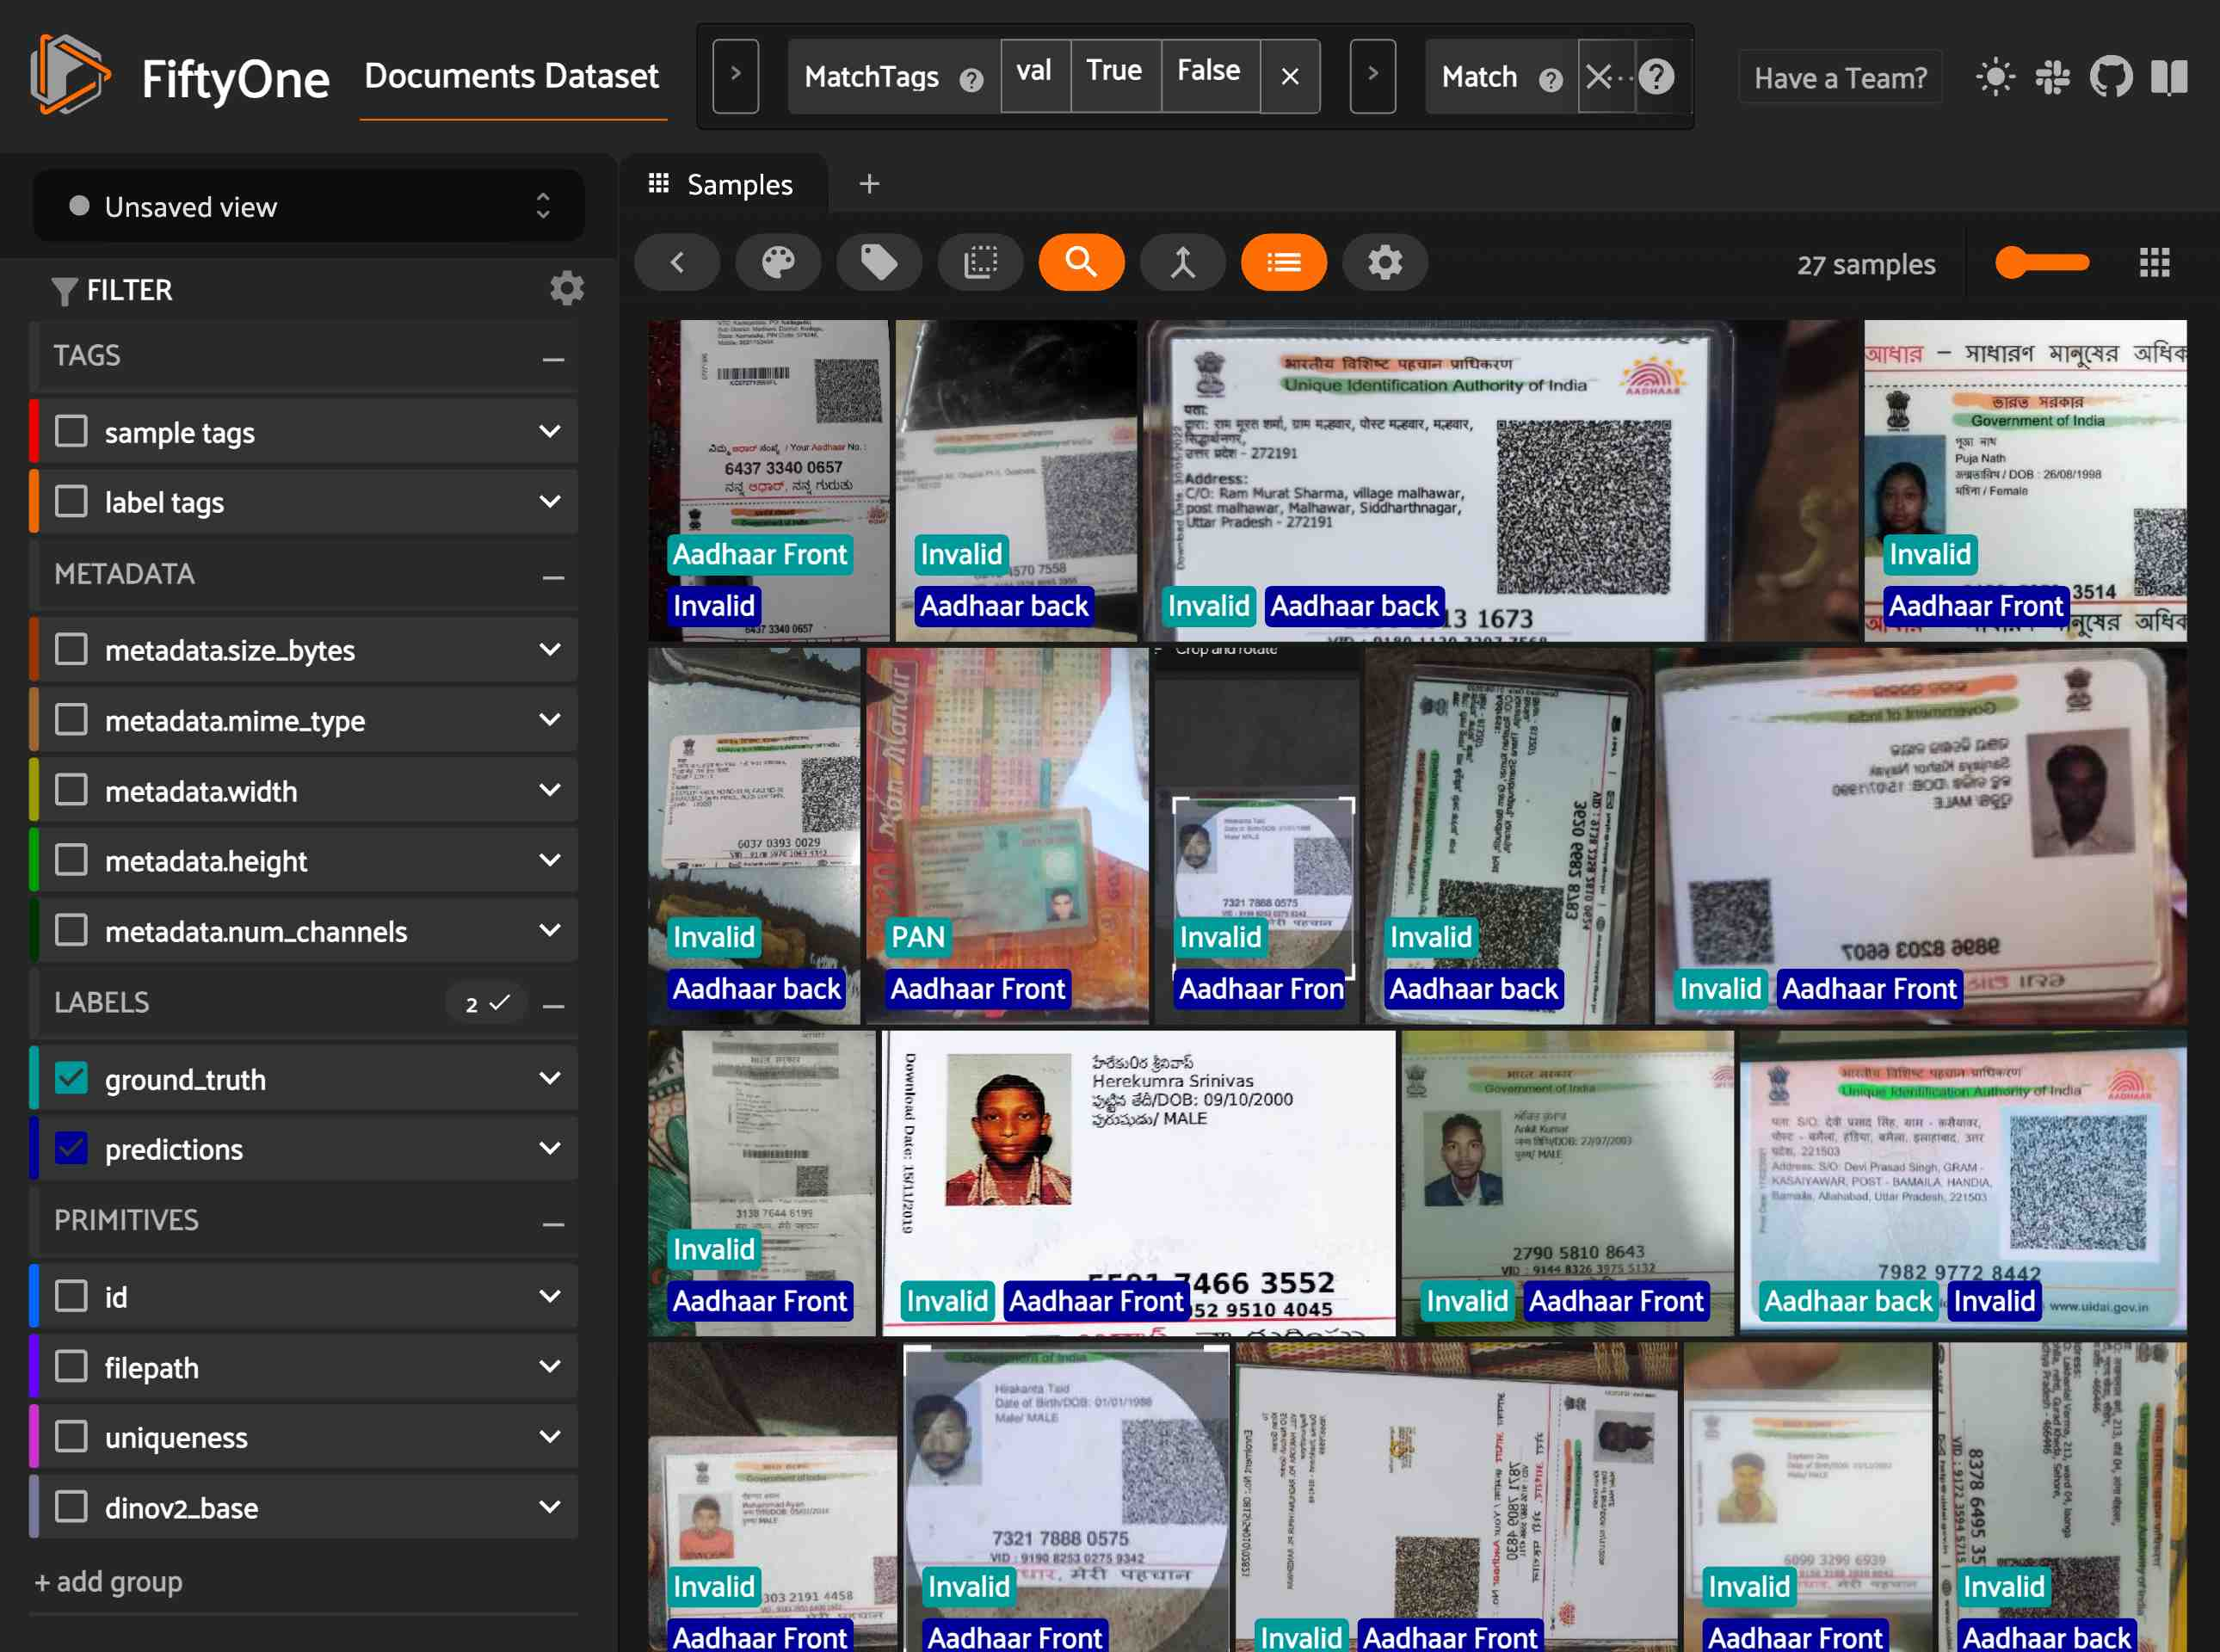

In [13]:
# Show most unique INCORRECT predictions on val split
session.view = (
    dataset
    .match_tags("val")
    .match(F("predictions.label") != F("ground_truth.label"))
    .sort_by("uniqueness", reverse=True)
)

### train

In [27]:
# Evaluate the predictions in the `predictions` field with respect to the
# labels in the `ground_truth` field
results_train = dataset.match_tags("train").evaluate_classifications(
    "predictions",
    gt_field="ground_truth",
    eval_key=eval_key
)

In [28]:
results_train.print_report()

               precision    recall  f1-score   support

Aadhaar Front       0.99      0.99      0.99       338
 Aadhaar back       0.98      1.00      0.99       270
      Invalid       0.93      0.91      0.92        86
          PAN       1.00      1.00      1.00        31

     accuracy                           0.98       725
    macro avg       0.98      0.97      0.97       725
 weighted avg       0.98      0.98      0.98       725



In [29]:
# Plot a confusion matrix
train_plot = results_train.plot_confusion_matrix()
train_plot.show()

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'type': 'scatter',
              'uid': '49e7600a-d200-472f-9f26-e04ad7828adf',
              'x': array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
              'y': array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])},
             {'colorscale': [[0.0, 'rgb(255,245,235)'], [0.125,
                             'rgb(254,230,206)'], [0.25, 'rgb(253,208,162)'],
                             [0.375, 'rgb(253,174,107)'], [0.5, 'rgb(253,141,60)'],
                             [0.625, 'rgb(241,105,19)'], [0.75, 'rgb(217,72,1)'],
                             [0.875, 'rgb(166,54,3)'], [1.0, 'rgb(127,39,4)']],
              'hoverinfo': 'skip',
              'showscale': False,
              'type': 'heatmap',
              'uid': '1fd16b35-1dcd-4f87-b471-d2efd987244e',
              'z': array([[  0,   0,   0,  31],
                          [  3,   5,  78,   0],
                          [ 

In [ ]:
train_plot.freeze()

## Hardness

In [16]:
fob.compute_hardness(dataset, "predictions")

Computing hardness...


 100% |█████████████████| 944/944 [1.9s elapsed, 0s remaining, 504.3 samples/s]      
Hardness computation complete



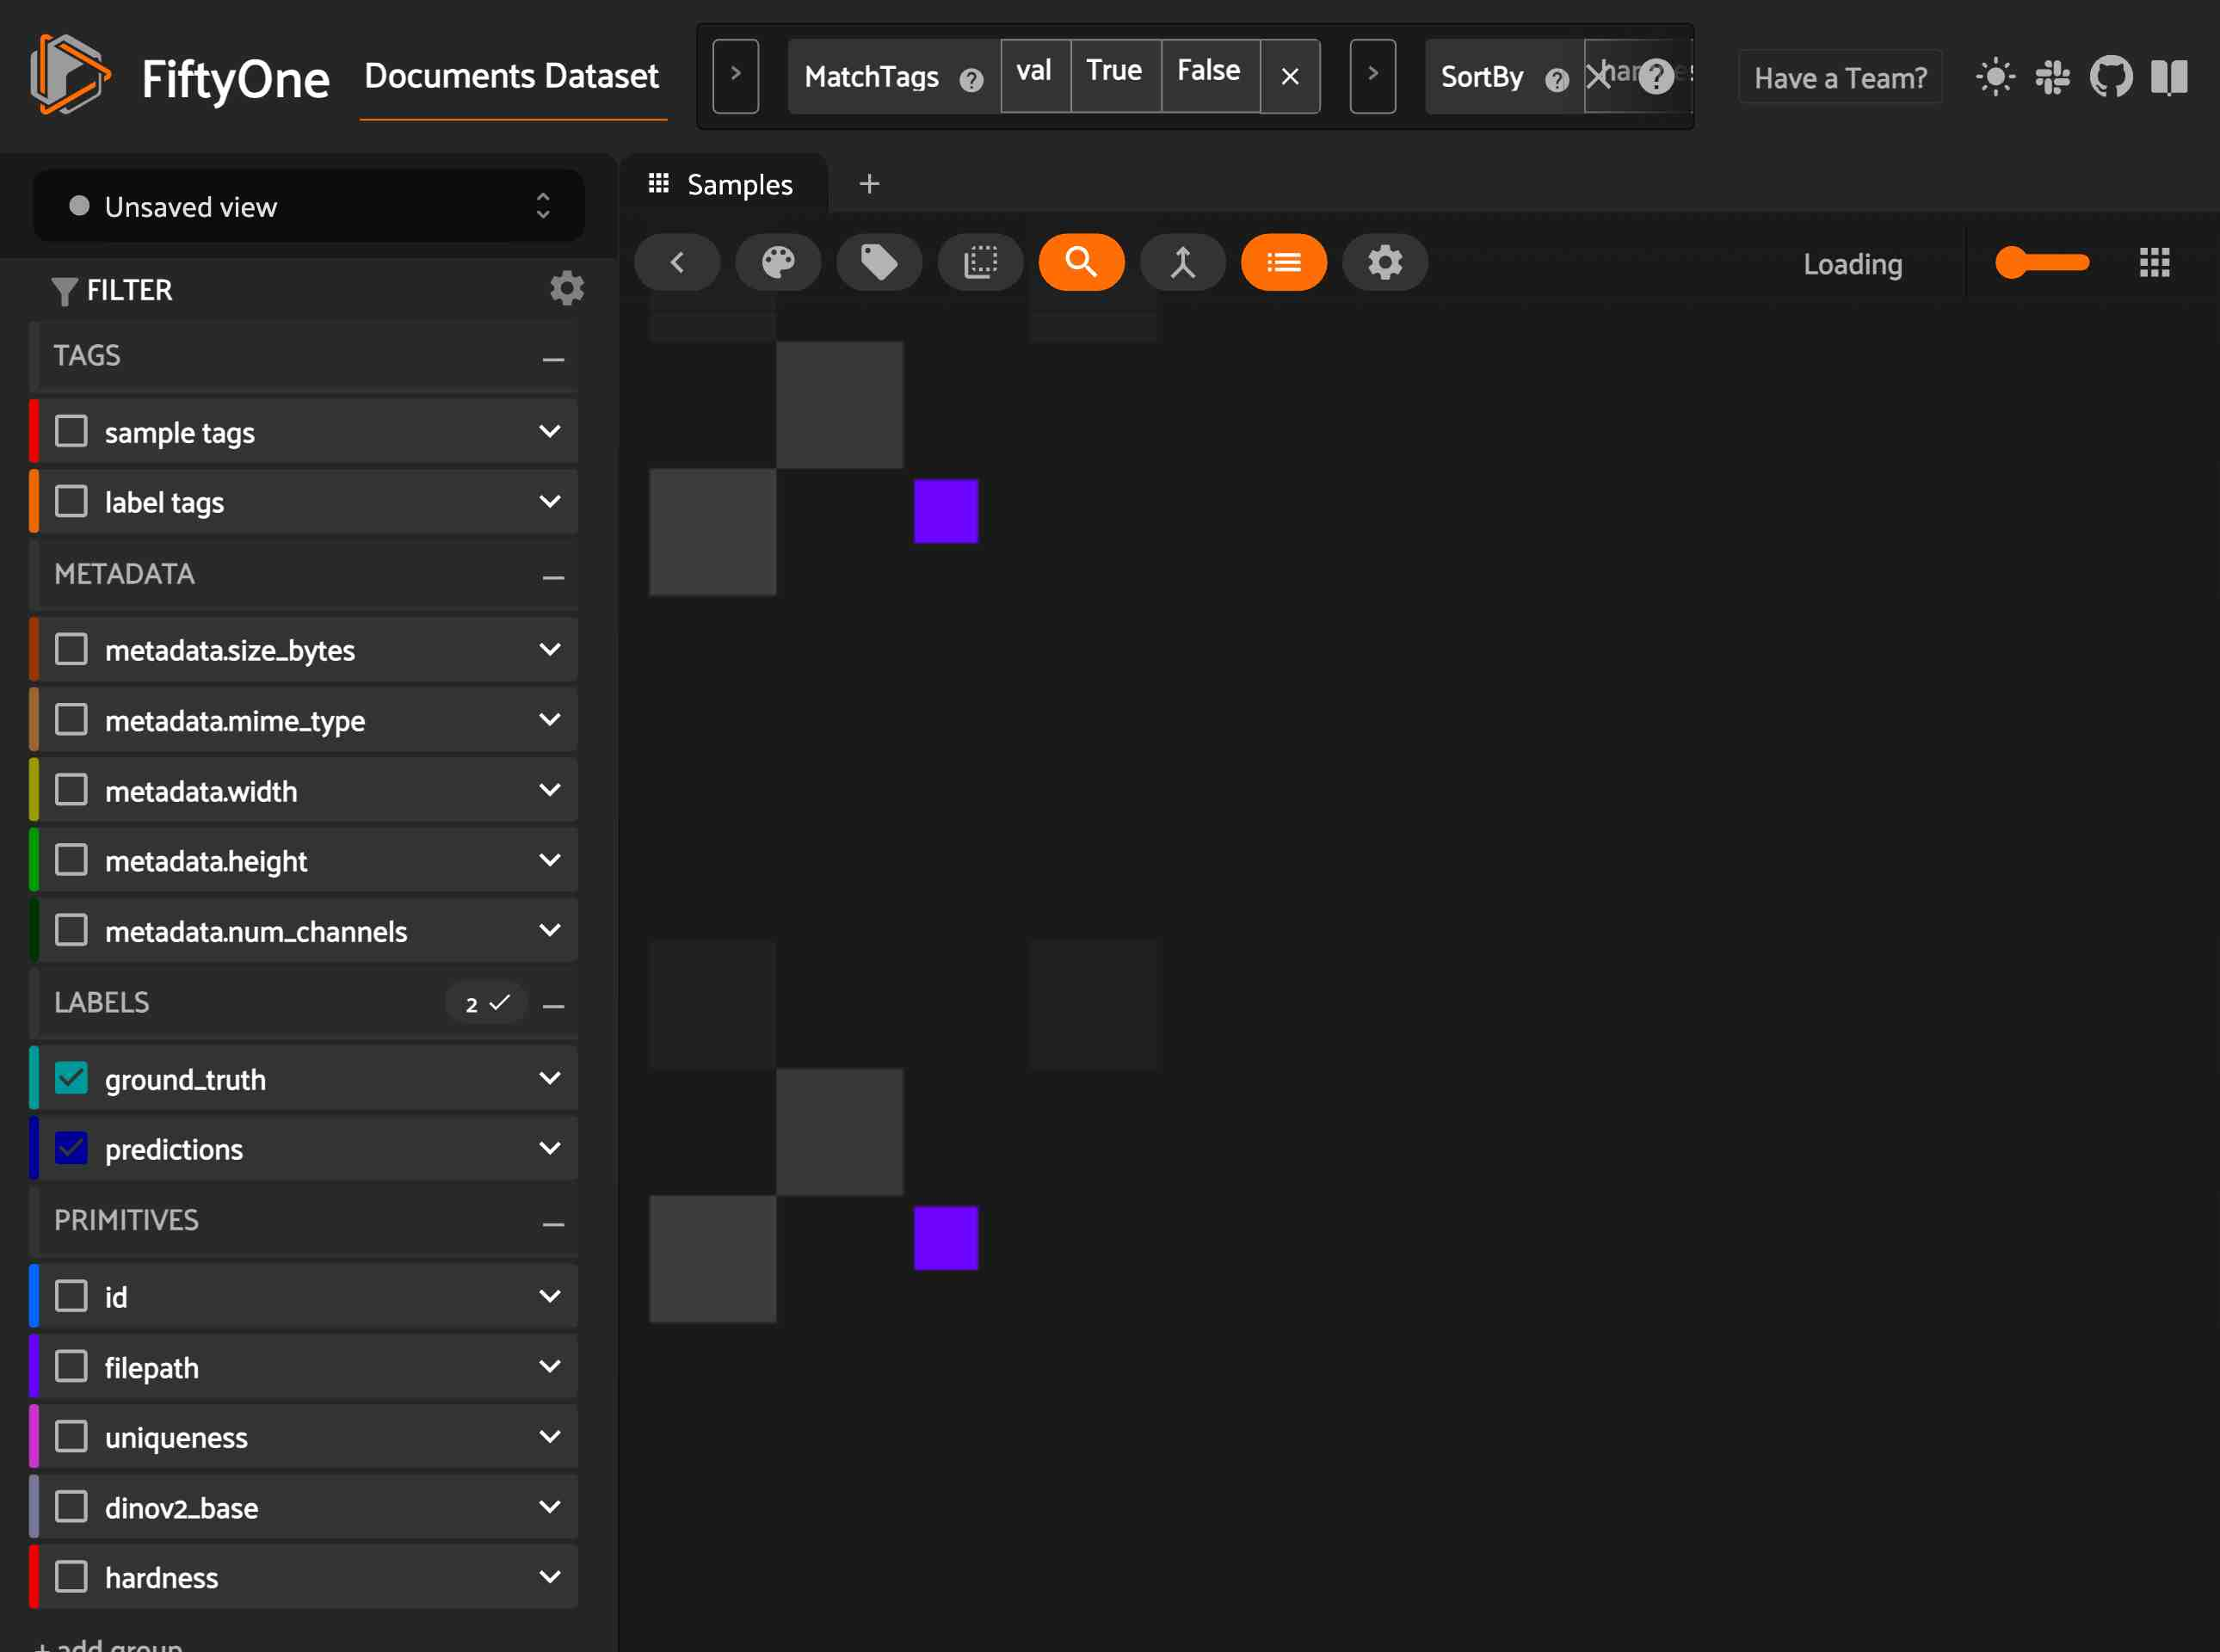

In [17]:
# Show the HARDEST FALSE POSITIVES on val split
session.view = (
    dataset
    .match_tags("val")
    .sort_by("hardness", reverse=True)
)

In [5]:
dataset.first()

<Sample: {
    'id': '653b93a77da98f61d75eeff4',
    'media_type': 'image',
    'filepath': '/Users/manan.tushar/Desktop/Projects/Id_classification/data/val/Aadhaar Front/PVC front_1696311246213471015_front_image.jpg',
    'tags': ['val'],
    'metadata': <ImageMetadata: {
        'size_bytes': 114750,
        'mime_type': 'image/jpeg',
        'width': 1488,
        'height': 967,
        'num_channels': 3,
    }>,
    'ground_truth': <Classification: {
        'id': '653b93a77da98f61d75eeff2',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': None,
        'logits': None,
    }>,
    'predictions': <Classification: {
        'id': '653b93a77da98f61d75eeff3',
        'tags': [],
        'label': 'Aadhaar Front',
        'confidence': 0.9282175898551941,
        'logits': array([ 3.928199 , -2.691205 ,  1.2898067, -1.4703163], dtype=float32),
    }>,
    'uniqueness': 0.4044577862470543,
    'eval_simple': True,
    'hardness': 0.2803982198238373,
    'mistake

## Annotation mistakes

In [18]:
fob.compute_mistakenness(dataset, "predictions", label_field="ground_truth")

Computing mistakenness...
 100% |█████████████████| 944/944 [1.5s elapsed, 0s remaining, 728.0 samples/s]         
Mistakenness computation complete



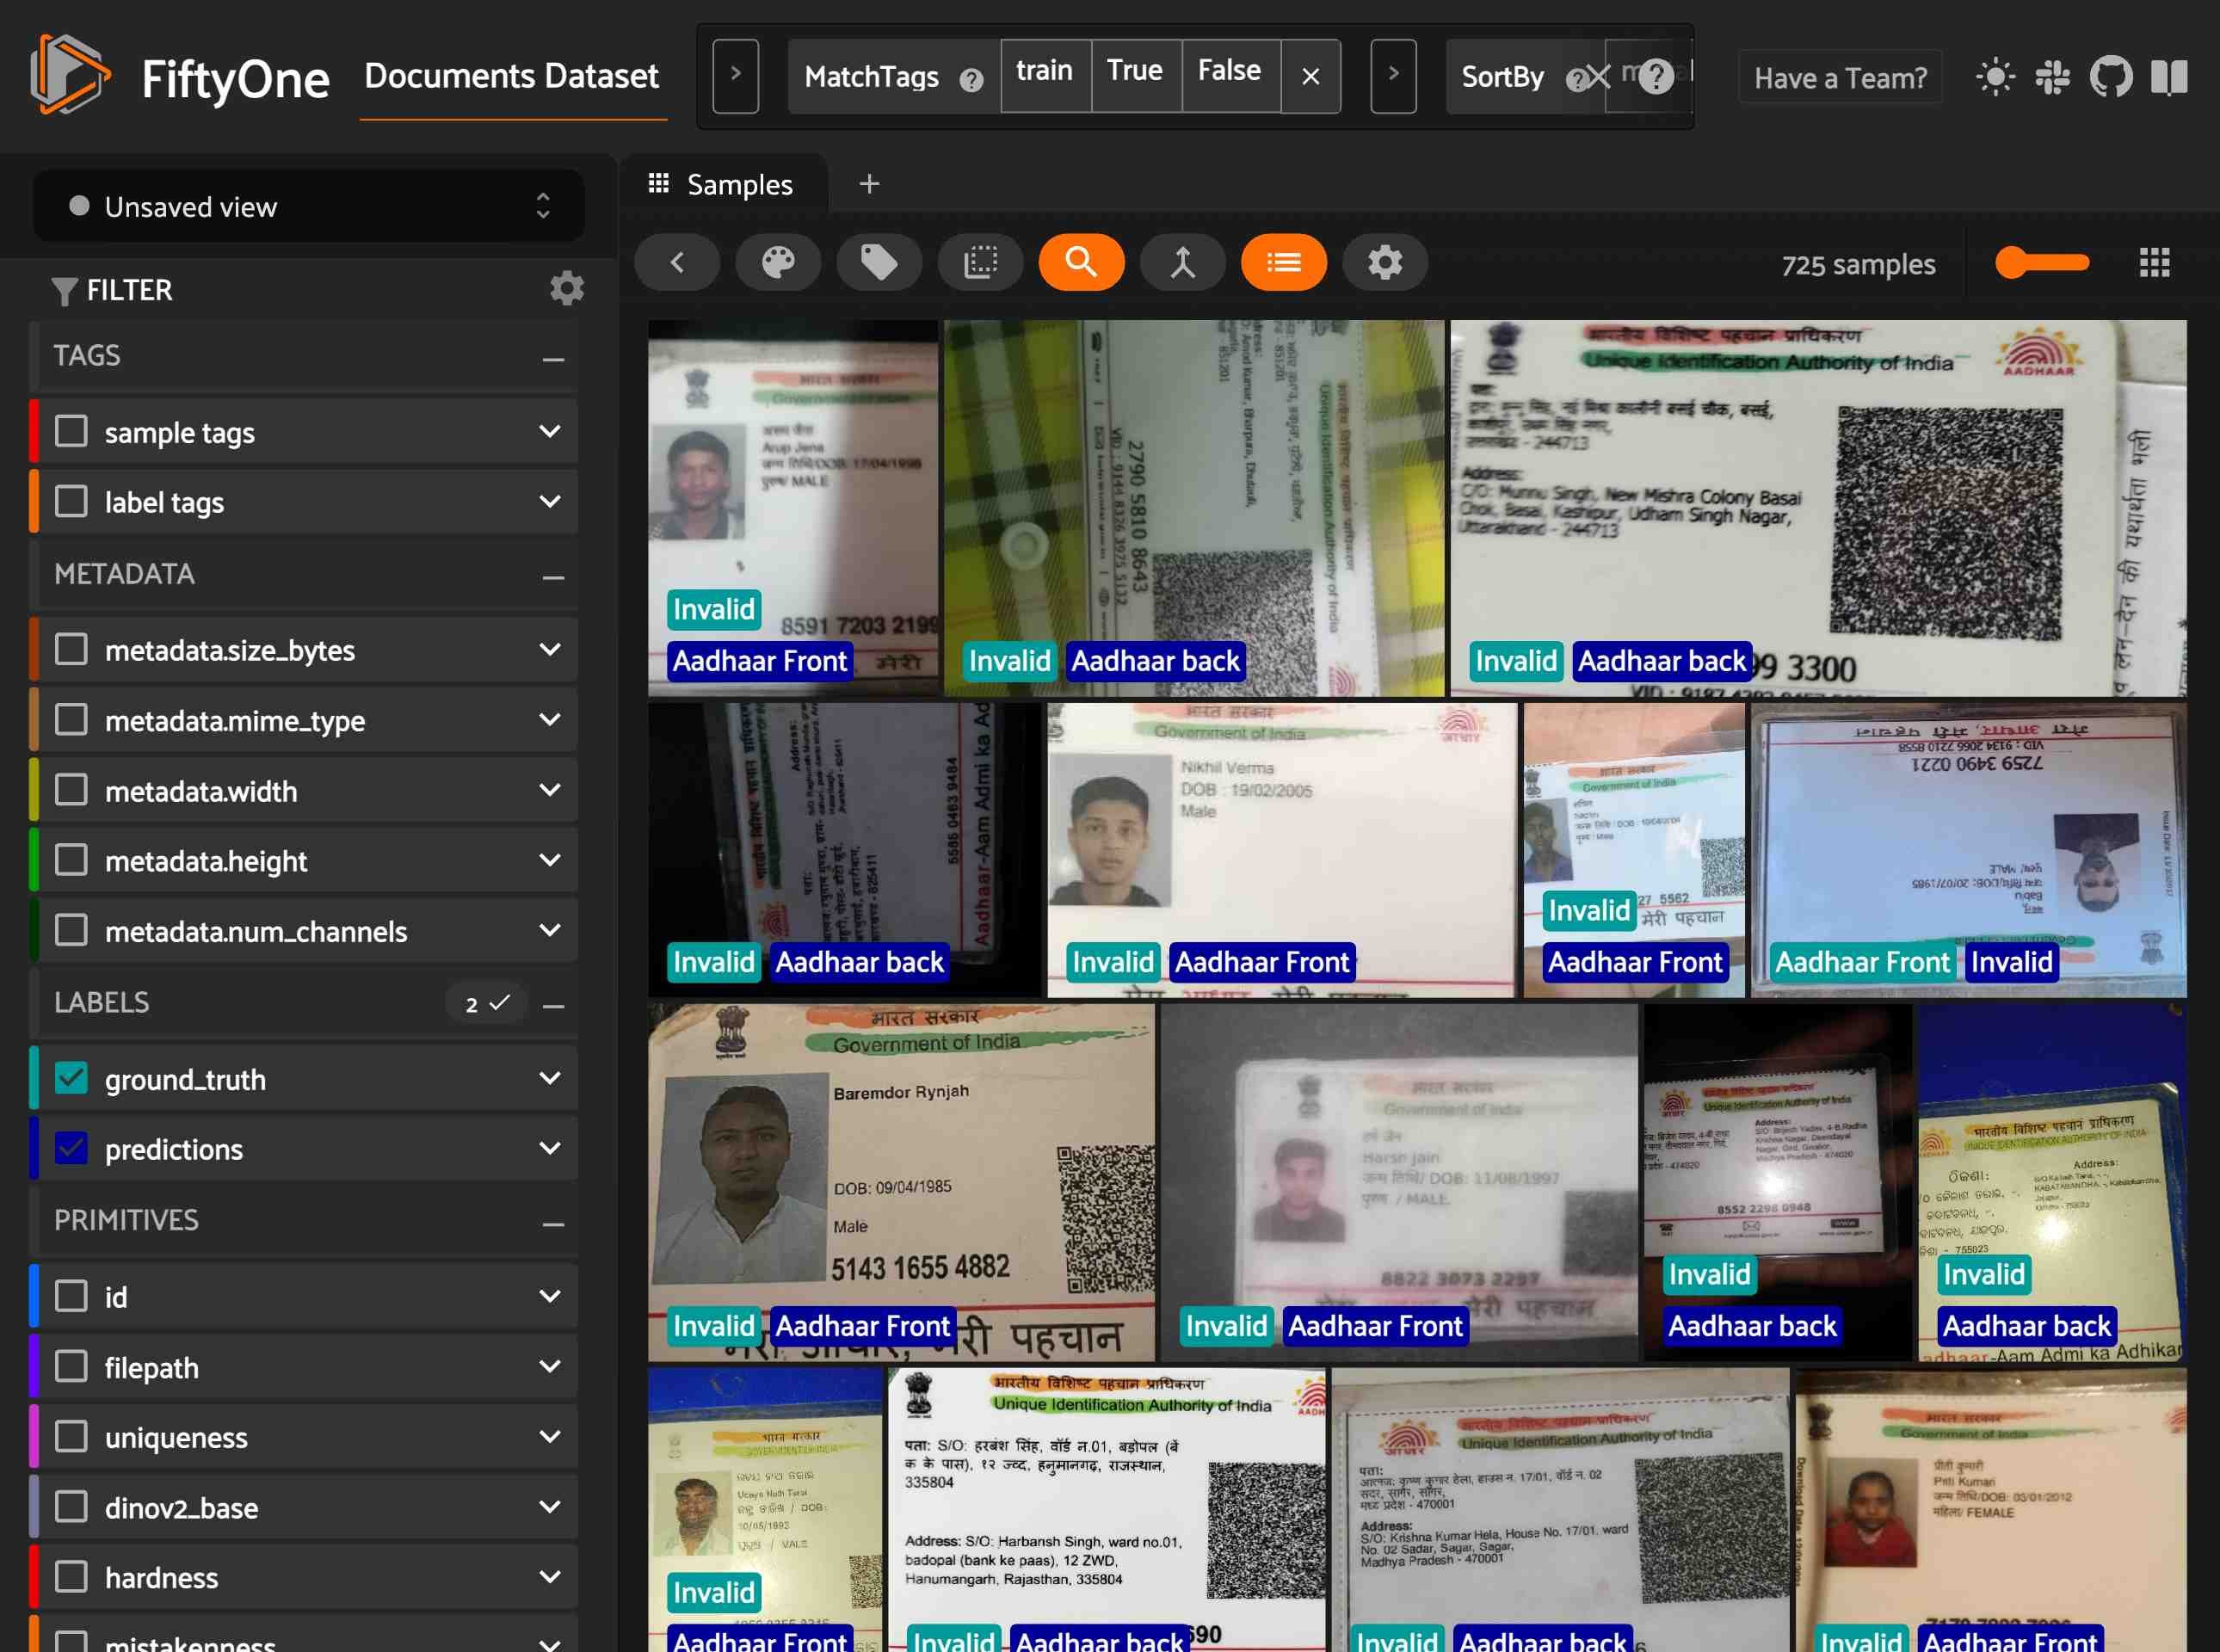

In [19]:
# Show the most likely ANNOTATION MISTAKES on the train split
session.view = (
    dataset
    .match_tags("train")
    .sort_by("mistakenness", reverse=True)
)

In [41]:
session.freeze()

## Delete (Caution!)

In [24]:
dataset = fo.load_dataset("") # put dataset name
dataset.delete()
fo.list_datasets()

['Deduped dataset - automatic',
 'Deduped dataset - automatic1',
 'Documents Dataset - Cleaned']